## PROJECT NAME: Feature Extraction and Price Prediction for Mobile Phones

### Overview: 

##### MobilePriceInsight is a data-driven project designed to enhance the pricing strategy of a leading mobile phone organization. By leveraging advanced analytics and machine learning, the project aims to extract meaningful insights from a comprehensive dataset of mobile phone features. The ultimate goal is to build a predictive model capable of accurately estimating mobile phone prices, empowering the organization to make informed pricing decisions in a highly competitive market

### Objective: 

##### The primary objective of MobilePriceInsight is to develop a robust predictive model that can precisely estimate the prices of mobile phones based on their key features. By understanding the relationships between various specifications and pricing, the organization seeks to optimize its pricing strategy, ensuring competitiveness and profitability

### Understanding the Problem Statement:

##### The challenge at hand involves analyzing a dataset containing detailed information about mobile phones. Key attributes include model, color, memory, RAM, battery capacity, camera specifications, AI lens presence, mobile height, processor, and price. The objective is to identify the most influential features affecting mobile phone prices, providing actionable insights for strategic pricing decisions.

### Algorithm Used:

##### For this predictive modeling task, the project will employ machine learning regression algorithms. The specific algorithm may include popular choices such as Linear Regression, Random Forest Regression & Gradient Boosting Regression. The selection will be based on performance during model evaluation and the ability to capture complex relationships in the data.

### Libraries are used

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
import joblib
import re

### Uses of each Libraries

* **pandas (pd)**: Data manipulation library in Python that provides data structures like DataFrame for efficient data analysis.

* **matplotlib.pyplot (plt)**: A 2D plotting library for creating static, animated, and interactive visualizations in Python.

* **numpy (np)**: Numerical computing library in Python that provides support for large, multi-dimensional arrays and matrices, along with mathematical functions.

* **seaborn (sns)**: Data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.

* **sklearn.compose.ColumnTransformer**: A transformer for applying different transformations to different columns of a DataFrame, useful for preprocessing in machine learning pipelines.

* **sklearn.decomposition.PCA**: Principal Component Analysis (PCA) for dimensionality reduction by transforming input data into a lower-dimensional space.

* **sklearn.ensemble.GradientBoostingRegressor**: A regression algorithm that builds an ensemble of decision trees sequentially, each correcting the errors of the previous one.

* **sklearn.ensemble.RandomForestRegressor**: A regression algorithm that builds an ensemble of decision trees and averages their predictions to improve accuracy and control overfitting.

* **sklearn.linear_model.LinearRegression**: A linear regression algorithm for modeling the relationship between a dependent variable and one or more independent variables.

* **sklearn.metrics.mean_squared_error**: A metric to evaluate the mean squared error between actual and predicted values.

* **sklearn.metrics.r2_score**: A metric to evaluate the goodness of fit in regression models.

* **sklearn.metrics.mean_absolute_error**: A metric to evaluate the mean absolute error between actual and predicted values.

* **sklearn.model_selection.train_test_split**: A function to split datasets into training and testing sets for model evaluation.

* **sklearn.preprocessing.LabelEncoder**: A utility to convert categorical labels into numerical form.

* **sklearn.preprocessing.OneHotEncoder**: A transformer to convert categorical values into a binary matrix (one-hot encoding).

* **sklearn.preprocessing.StandardScaler**: A transformer to standardize features by removing the mean and scaling to unit variance.

* **sklearn.tree.DecisionTreeRegressor**: A regression algorithm that builds a decision tree to predict the target variable based on input features.

* **sklearn.tree.plot_tree**: A function to visualize the structure of a decision tree.

* **joblib**: Library for lightweight pipelining in Python, providing tools to efficiently save and load Python objects.

* **re**: Python's regular expression library for pattern matching and text manipulation.

### Data Exploration

* Importing the data from Processed_Flipdata file, used for reading the contents of CSV file and creates a data frame

In [134]:
mobile_data = pd.read_csv("Processed_Flipdata.csv")
mobile_data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


### Retriving Column names

In [135]:
mobile_data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

### Data Overview- Provides Insight into Dataset Structure and Characteristics

In [136]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


### Statistical Summary of mobile_data

In [137]:
mobile_data.describe().round(2)

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.00,541.00,541.00,541.00,541.00,541.00
mean,289.71,110.55,5.40,4871.59,0.06,16.43
std,182.36,60.60,1.98,780.15,0.24,2.52
min,0.00,16.00,2.00,800.00,0.00,4.50
25%,135.00,64.00,4.00,5000.00,0.00,16.51
50%,273.00,128.00,6.00,5000.00,0.00,16.71
75%,434.00,128.00,8.00,5000.00,0.00,16.94
max,642.00,256.00,8.00,7000.00,1.00,41.94


### Dataset Dimensions and Structure

In [138]:
rows, col = mobile_data.shape
print ("Dimensions of dataset: {}" . format (mobile_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (541, 12)
Rows: 541 
Columns: 12


### Finding the Missing values

In [139]:
mobile_data.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

### Convert Object to Integer

In [140]:
import re

mobile_data['Rear Camera'] = mobile_data['Rear Camera'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None)
mobile_data['Front Camera'] = mobile_data['Front Camera'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None)

mobile_data['Rear Camera'] = pd.to_numeric(mobile_data['Rear Camera'], errors='coerce')
mobile_data['Front Camera'] = pd.to_numeric(mobile_data['Front Camera'], errors='coerce')

* We have replaced the 'Rear Camera' and 'Front Camera' columns, which were initially in object format, and converted them to integer type. This conversion is beneficial when dealing with numerical values in these columns, enabling operations such as mathematical calculations & Model building

### After Conversion finding the data type

In [141]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    int64  
 7   Front Camera   541 non-null    int64  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(7), object(4)
memory usage: 50.8+ KB


### DataFrame Adjustment: Removing 'Unnamed: 0' Column from mobile_data

In [158]:
mobiledata = mobile_data.drop(columns=['Unnamed: 0'])
mobiledata

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


### Converting String to Integer

In [159]:
mobile_data['Prize'] = mobile_data['Prize'].astype(str).str.replace(',', '').astype('int64')

### Rename the name of the Columns

In [160]:
mobiledata=mobiledata.rename(columns={'Prize':'Price', 'Battery_':'Battery', 'Processor_':'Processor'})
mobiledata

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


In [161]:
mobiledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          541 non-null    object 
 1   Colour         541 non-null    object 
 2   Memory         541 non-null    int64  
 3   RAM            541 non-null    int64  
 4   Battery        541 non-null    int64  
 5   Rear Camera    541 non-null    int64  
 6   Front Camera   541 non-null    int64  
 7   AI Lens        541 non-null    int64  
 8   Mobile Height  541 non-null    float64
 9   Processor      541 non-null    object 
 10  Price          541 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.6+ KB


### Unique Values Analysis: Counting and Displaying the Number of Unique Values for Each Column in the Dataset

In [145]:
unique = mobiledata.nunique()
unique.to_frame().T

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,187,275,5,5,37,14,13,2,38,123,158


### Unique Items in Dataset: Extracting and Displaying Distinct Values

In [146]:
mobiledata['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [147]:
mobiledata['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

In [148]:
mobiledata['Memory'].unique()

array([ 64, 128,  32, 256,  16], dtype=int64)

In [149]:
mobiledata['RAM'].unique()

array([4, 8, 2, 6, 3], dtype=int64)

In [150]:
mobiledata['Battery'].unique()

array([6000, 5000, 4500,  800, 1900, 1000, 4400, 1020, 4410, 5080, 2550,
       4980, 4600, 1200, 1500, 3300, 4020, 4300, 4800, 4200, 4610, 4050,
       4270, 4000, 4030, 4115, 3000, 3110, 4700, 5020, 4323, 4830, 5200,
       7000, 2815, 3900, 3100], dtype=int64)

In [151]:
mobiledata['Rear Camera'].unique()

array([ 13,  50,   8,  40,  32,  48,  64, 108,   0,   2,  12, 200,   5,
        16], dtype=int64)

In [152]:
mobiledata['Front Camera'].unique()

array([ 5, 16,  8, 13,  0, 32, 10, 50, 60, 20, 44,  2, 12], dtype=int64)

In [153]:
mobiledata['AI Lens'].unique()

array([1, 0], dtype=int64)

In [154]:
mobiledata['Mobile Height'].unique()

array([16.76, 16.64, 16.56, 17.02, 16.51, 16.71, 17.04, 16.21, 16.94,
       16.33, 41.94, 17.07,  4.5 ,  7.11, 16.26,  6.1 , 15.6 , 16.81,
        5.08, 16.59, 16.43, 16.66, 17.22, 16.36, 17.32, 15.46,  4.57,
       16.54, 15.49, 16.  , 15.7 , 16.69, 15.8 , 13.84, 17.53, 16.55,
       17.65, 12.7 ])

In [155]:
mobiledata['Processor'].unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


In [156]:
mobiledata['Price'].unique()

array(['7,299', '11,999', '5,649', '8,999', '7,999', '9,499', '10,699',
       '6,999', '15,999', '13,999', '12,999', '6,199', '6,599', '7,749',
       '9,699', '9,999', '10,999', '20,999', '15,499', '18,999', '12,499',
       '10,499', '14,490', '16,999', '6,499', '5,999', '6,299', '16,499',
       '14,499', '13,490', '19,999', '1,449', '1,849', '1,422', '29,999',
       '1,299', '17,999', '11,499', '2,615', '28,999', '23,999', '14,999',
       '2,490', '7,961', '2,499', '11,248', '6,799', '13,499', '8,749',
       '8,049', '1,375', '1,599', '7,499', '7,245', '26,999', '21,999',
       '17,499', '21,499', '7,115', '49,999', '32,999', '8,499', '25,999',
       '4,999', '3,549', '1,699', '920', '11,970', '1,199', '12,990',
       '6,978', '7,370', '44,999', '8,995', '24,999', '11,249', '34,999',
       '21,174', '43,999', '7,993', '8,069', '30,499', '30,999', '9,290',
       '8,449', '8,495', '29,499', '20,998', '19,280', '8,649', '19,499',
       '9,349', '8,288', '12,272', '6,794', '2

### Grouping and Calculating Mean Prices

In [162]:
mobiledata[['RAM','Price']].groupby(['RAM'],as_index=False).mean().round(2)

,RAM,Price
0,2,7864.70
1,3,9893.40
2,4,11770.92
3,6,17405.97
4,8,24186.67


In [65]:
mobiledata[['Memory','Price']].groupby(['Memory'],as_index=False).mean().round(2)

,Memory,Price
0,16,2981.00
1,32,6749.29
2,64,10585.01
3,128,19620.41
4,256,28002.71


In [66]:
mobiledata[['Battery','Price']].groupby(['Battery'],as_index=False).mean().round(2)

,Battery,Price
0,800,1627.20
1,1000,1240.25
2,1020,2537.67
3,1200,3549.00
4,1500,1199.00
5,1900,1849.00
6,2550,1375.00
7,2815,53999.00
8,3000,6049.00
9,3100,5998.00


### Descriptive Statistics for Mobile Data Features

In [163]:
mobiledata.iloc[:, :-1].describe().T.style.format("{:.2f}").background_gradient(cmap="Greens")\
    .bar(subset=["max"], color='#F8766D')\
    .bar(subset=["mean"], color='#00BFC4')\
    .set_table_styles([{'selector': 'thead', 'props': [('background', '#606060'), ('color', 'white')]}])\
    .set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
    .set_properties(subset=["count", "mean", "min", "25%", "50%", "75%", "max"], **{'text-align': 'center'})

,count,mean,std,min,25%,50%,75%,max
Memory,541.00,110.55,60.60,16.00,64.00,128.00,128.00,256.00
RAM,541.00,5.40,1.98,2.00,4.00,6.00,8.00,8.00
Battery,541.00,4871.59,780.15,800.00,5000.00,5000.00,5000.00,7000.00
Rear Camera,541.00,46.11,31.26,0.00,13.00,50.00,50.00,200.00
Front Camera,541.00,11.99,9.05,0.00,5.00,8.00,16.00,60.00
AI Lens,541.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
Mobile Height,541.00,16.43,2.52,4.50,16.51,16.71,16.94,41.94


### Data Type Segmentation: Identifying and Categorizing Columns into Numeric and Categorical in Mobile Data

In [164]:
numeric_df = mobiledata.select_dtypes(include=[np.number])
categorical_df = mobiledata.select_dtypes(exclude=[np.number])

numerical = numeric_df.columns.tolist()
categorical = categorical_df.columns.tolist()

print('Categorical:', categorical)
print('\nNumeric:', numerical)

Categorical: ['Model', 'Colour', 'Processor']

Numeric: ['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Price']


### Custom Boxplots for Numeric Variables: Visualizing Data Distribution and Skewness in Mobile Data

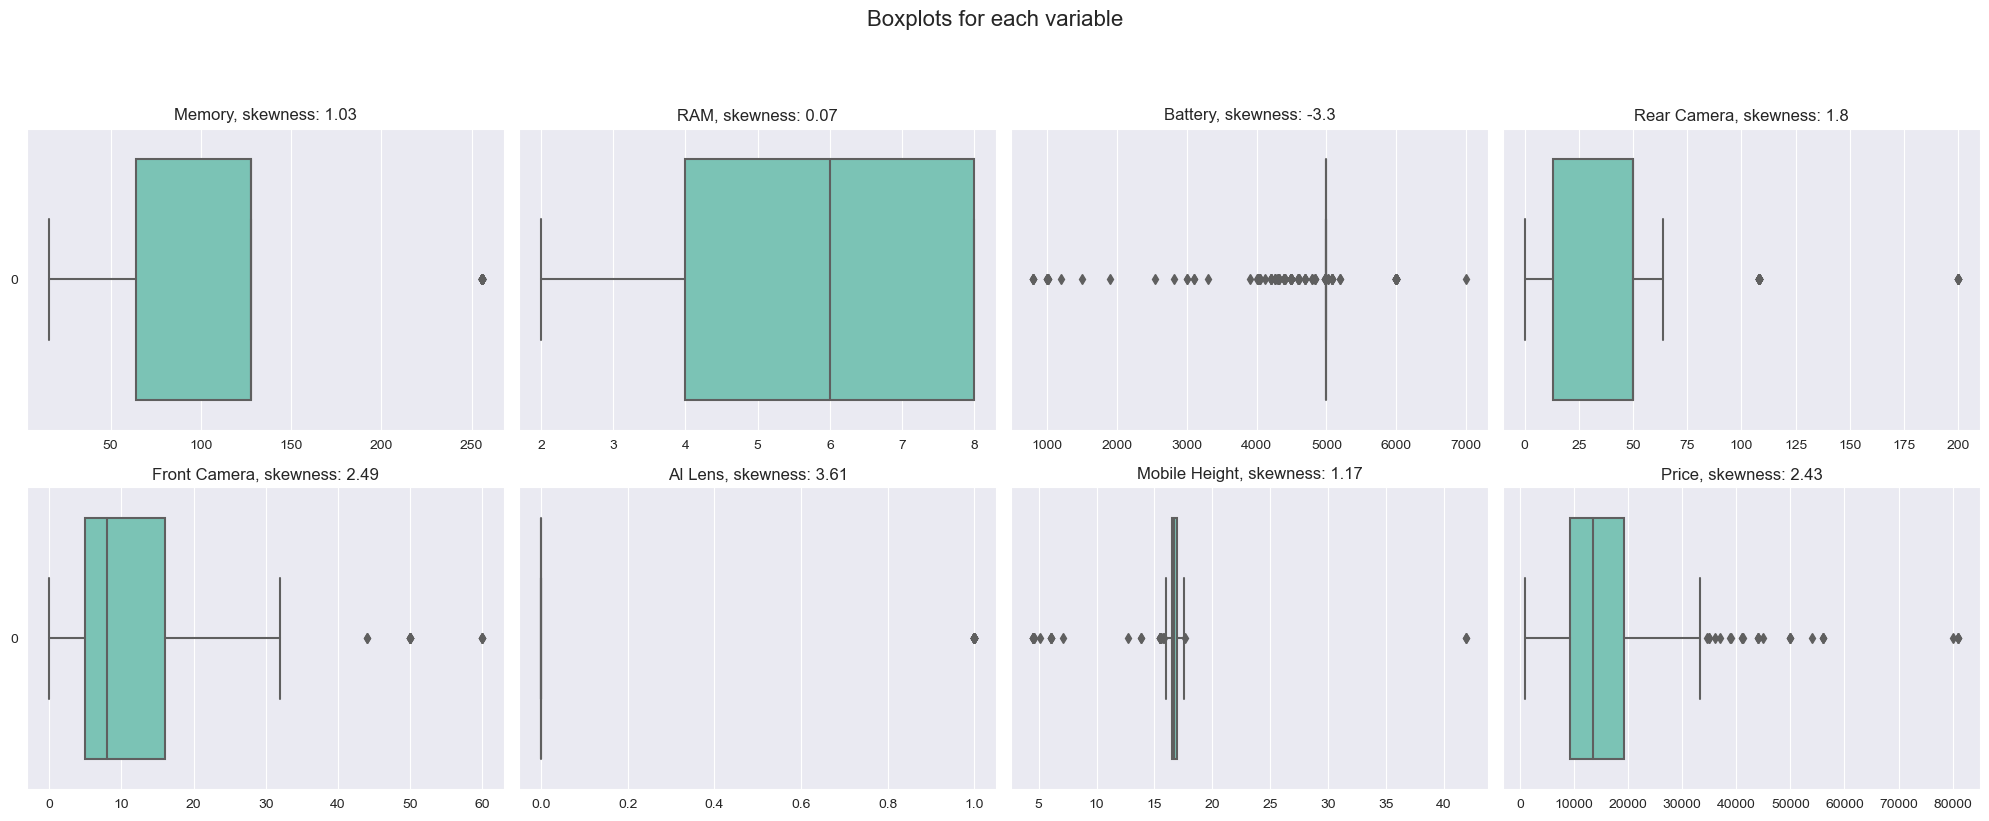

In [78]:
import seaborn as sns

def boxplots_custom(dataset, columns_list, suptitle):
    num_columns = len(columns_list)
    
    fig, axs = plt.subplots(2, num_columns//2 + num_columns%2, sharey=True, figsize=(20, 8))
    axs = axs.flatten()
    fig.suptitle(suptitle, y=1.02, size=16)

    for i, data in enumerate(columns_list): 
        row = i // (num_columns//2 + num_columns%2)
        col = i % (num_columns//2 + num_columns%2)

        sns.boxplot(data=dataset[data], orient='h', color='#6fcfbc', ax=axs[i])
        
        axs[i].set_title(data + ', skewness: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    plt.tight_layout(rect=[0, 0, 1, 0.96]) 

boxplots_custom(dataset=mobiledata, columns_list=numerical, suptitle='Boxplots for each variable')
plt.show()

* The data distribution and skewness values for various mobile data attributes provide insights into their respective distributions. 
* Memory and RAM exhibit relatively mild skewness, with values of 1.03 and 0.07, respectively, indicating moderately symmetrical distributions. 
* The battery skewness of -3.3 suggests a pronounced negative skewness, signifying concentration towards higher battery levels. * The rare camera skewness of 1.8 and front camera skewness of 2.49 both indicate positive skewness, implying prevalent higher values, possibly reflecting better camera specifications in most mobile devices.
* AI_lense skewness of 3.61 suggests a highly positively skewed distribution, indicating that higher values are significantly more common in AI lens specifications. 
* The Mobile Height skewness of 1.7 indicates a moderately positively skewed distribution, implying that taller mobile devices are more prevalent. 
* The price skewness of -2.43 denotes a negatively skewed distribution, suggesting that a majority of mobile devices have lower prices.

* **Conclusion**, these skewness values collectively contribute to a comprehensive understanding of the distribution patterns across various mobile data attributes.

### Correlation Matrix: Analyzing Pairwise Correlations Among Numeric Variables in Mobile Data

In [80]:
correlation_matrix=mobiledata.corr().round(2)
correlation_matrix

C:\Users\pooji\AppData\Local\Temp\ipykernel_23704\3985414315.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=mobiledata.corr().round(2)


,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Price
Memory,1.00,0.63,-0.05,0.53,0.50,-0.09,0.06,0.57
RAM,0.63,1.00,-0.10,0.44,0.49,-0.08,0.09,0.53
Battery,-0.05,-0.10,1.00,0.20,0.03,0.15,0.70,-0.03
Rear Camera,0.53,0.44,0.20,1.00,0.51,-0.04,0.24,0.41
Front Camera,0.50,0.49,0.03,0.51,1.00,-0.11,0.21,0.53
AI Lens,-0.09,-0.08,0.15,-0.04,-0.11,1.00,0.05,-0.15
Mobile Height,0.06,0.09,0.70,0.24,0.21,0.05,1.00,0.18
Price,0.57,0.53,-0.03,0.41,0.53,-0.15,0.18,1.00


### Visualizing Correlations: Heatmap of the Correlation Matrix for Numeric Variables in Mobile Data

C:\Users\pooji\AppData\Local\Temp\ipykernel_3440\661692427.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = mobiledata.corr()


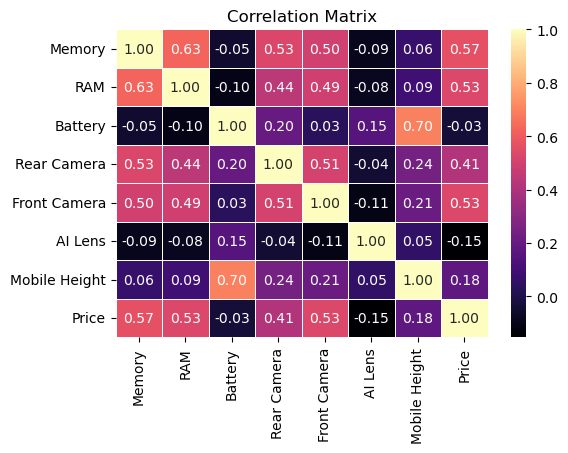

In [286]:
corr_matrix = mobiledata.corr()

plt.figure(figsize=(6, 4))

sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

* **Conclusion**: 

* The correlation coefficient ranges from -1 to +1. When it is close to +1, this signifies a strong positive correlation. When it is close to -1, it indicates a strong negative correlation. When it is close to 0, it means there is no correlation.

* The heatmap visually represents the strength and direction of correlations between pairs of variables. The statement Battery, Mobile height Memory and RAM are highly correlated" suggests a strong correlation between the variables representing Battery, Mobile height Memory and RAM in the dataset.

* The heatmap, featuring annotations and color gradients, offers a clear overview of the strength and direction of correlations between different features in the dataset. The positive correlation between Battery, Mobile height Memory and RAM is likely emphasized by a higher correlation coefficient in the corresponding cell of the heatmap.


### Price Correlation Heatmap: Analyzing Correlation of Mobile Data Features with Price

C:\Users\pooji\AppData\Local\Temp\ipykernel_3440\434715211.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mobiledata.corr()[['Price']], annot =True, cmap= 'magma')


Text(0.5, 1.0, 'Corelation matrix for Mobile Price')

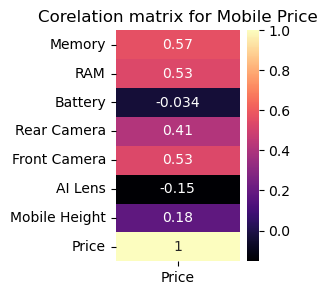

In [287]:
plt.figure(figsize=(2,3))
sns.heatmap(mobiledata.corr()[['Price']], annot =True, cmap= 'magma')
plt.title('Corelation matrix for Mobile Price')

* The correlation matrix for the 'Price' column in the 'mobiledata' dataset, using the seaborn library. The heatmap visually represents the correlation between the 'Price' column and other columns in the dataset. The analysis suggests that RAM, Memory and Front Camera have a significant positive correlation with the price of mobile devices. This implies that as the RAM, Memory and Front camera specifications increase, the price of the mobile device tends to increase as well. The heatmap provides a quick and informative overview of these correlations, aiding in understanding the potential factors influencing the pricing of mobile devices.

### Analyzing the Relationship Between Memory and Mobile Price Using a Bar Plot

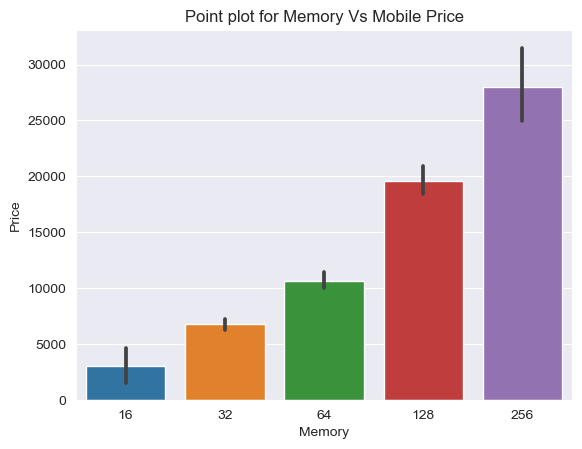

In [83]:
sns.barplot(data=mobiledata, x='Memory', y='Price')
plt.title('Point plot for Memory Vs Mobile Price')
plt.xlabel('Memory')
plt.ylabel('Price')
plt.show()

* The bar plot depicting the relationship between memory and mobile price clearly illustrates a positive correlation – as the memory capacity of a mobile device increases, so does its price. This insight suggests that consumers can expect to pay a higher price for smartphones with larger storage capacities. The visual representation provided by the bar plot serves as a valuable tool for understanding the pricing dynamics in the mobile market based on memory specifications. As technology advances and consumers continue to demand greater storage capabilities, this relationship between memory and price is likely to play a significant role in shaping the mobile industry landscape

### Analyzing the Relationship Between RAM and Mobile Price Using a Bar Plot

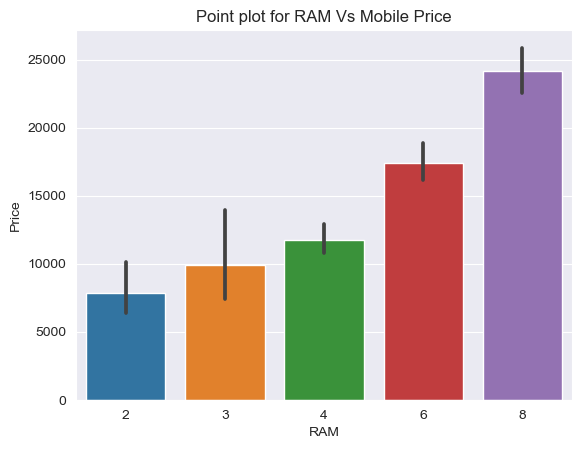

In [86]:
sns.barplot(data=mobiledata, x='RAM', y='Price')
plt.title('Point plot for RAM Vs Mobile Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.show()

* The conclusion drawn from the provided bar chart suggests a positive correlation between RAM (Random Access Memory) and mobile prices. As the RAM capacity increases, there is an apparent trend of higher mobile prices. This observation aligns with the common expectation that devices with greater RAM tend to be more expensive. It implies that consumers can anticipate an increase in the cost of a mobile device as they opt for models with larger RAM capacities.

### Joint plot for Battery Capacity and Mobile Price

<Figure size 800x600 with 0 Axes>

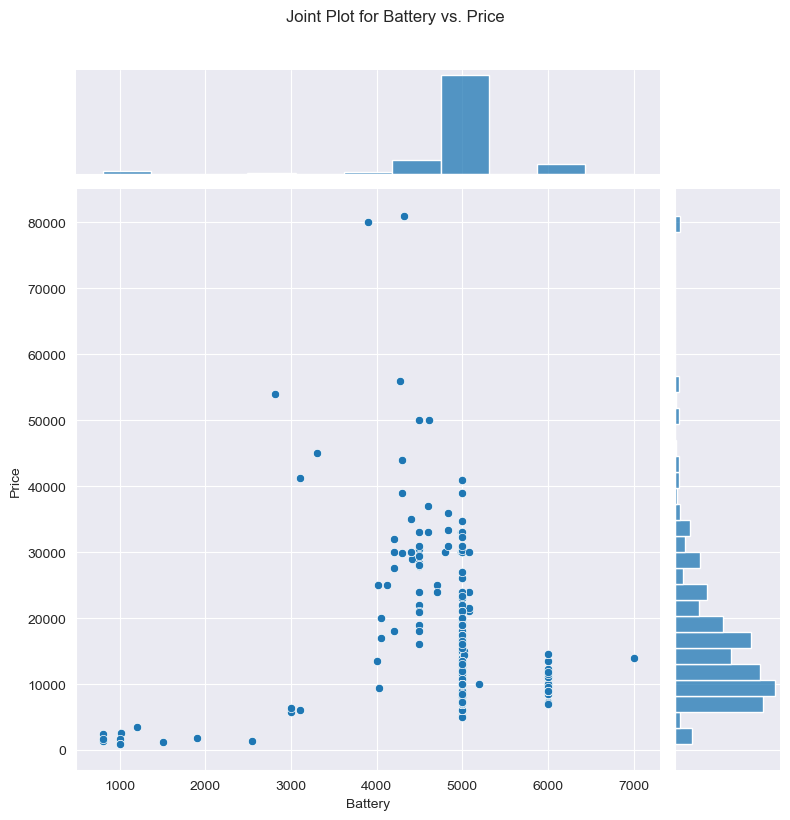

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

sns.jointplot(data=mobiledata, x='Battery', y='Price', kind='scatter', height=8)
plt.suptitle('Joint Plot for Battery vs. Price', y=1.02)  
plt.tight_layout()  
plt.show()

* Based on the observation of the chart, a clear conclusion emerges: there is a positive correlation between battery capacity mAh and the price of the product. Specifically, when the battery capacity falls within the range of 4500-5000 mAh, the price tends to be higher. This suggests that consumers are willing to pay a premium for devices with larger battery capacities, indicating a perceived value in extended battery life. As a result, manufacturers and marketers may find this information valuable when positioning and pricing their products in the market.

### Data Preprocessing

* Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves cleaning, transforming, and organizing raw data into a format that is suitable for analysis or for training machine learning models. Proper data preprocessing can significantly impact the performance and accuracy of your models

In [165]:
object_features=mobiledata.select_dtypes(include='object').columns.tolist()
object_features

['Model', 'Colour', 'Processor']

### Identifying Outliers

* Outliers are data points that deviate significantly from the rest of the data and may indicate errors in the data collection process or interesting patterns in the data. as outliers can significantly affect the performance and accuracy of statistical analyses and machine learning models.

### Number of Outliers in each columns

In [166]:
Q1 = mobiledata.quantile(0.25)
Q3 = mobiledata.quantile(0.75)
IQR = Q3 - Q1

outliers = ((mobiledata < (Q1 - 1.5 * IQR)) | (mobiledata > (Q3 + 1.5 * IQR)))

num_outliers = outliers.sum()

num_outliers.to_frame().T

C:\Users\pooji\AppData\Local\Temp\ipykernel_3440\2912393269.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = mobiledata.quantile(0.25)
C:\Users\pooji\AppData\Local\Temp\ipykernel_3440\2912393269.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = mobiledata.quantile(0.75)
C:\Users\pooji\AppData\Local\Temp\ipykernel_3440\2912393269.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((mobiledata < (Q1 - 1.5 * IQR)) | (mobiledata > (Q3 + 1.5 * IQR

,AI Lens,Battery,Colour,Front Camera,Memory,Mobile Height,Model,Price,Processor,RAM,Rear Camera
0,34,152,0,13,55,33,0,25,0,0,39


In [167]:
Q1 = mobiledata.quantile(0.25, numeric_only=True)
Q3 = mobiledata.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1

outliers = ((mobiledata < (Q1 - 1.5 * IQR)) | (mobiledata > (Q3 + 1.5 * IQR))).any(axis=1)

C:\Users\pooji\AppData\Local\Temp\ipykernel_3440\2878025133.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((mobiledata < (Q1 - 1.5 * IQR)) | (mobiledata > (Q3 + 1.5 * IQR))).any(axis=1)


In [168]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: Memory             64.00
RAM                 4.00
Battery          5000.00
Rear Camera        13.00
Front Camera        5.00
AI Lens             0.00
Mobile Height      16.51
Price            9290.00
Name: 0.25, dtype: float64
Q3: Memory             128.00
RAM                  8.00
Battery           5000.00
Rear Camera         50.00
Front Camera        16.00
AI Lens              0.00
Mobile Height       16.94
Price            19280.00
Name: 0.75, dtype: float64
IQR: Memory             64.00
RAM                 4.00
Battery             0.00
Rear Camera        37.00
Front Camera       11.00
AI Lens             0.00
Mobile Height       0.43
Price            9990.00
dtype: float64


In [169]:
print("Outliers:", outliers)

Outliers: 0       True
1       True
2      False
3      False
4       True
       ...  
536     True
537     True
538    False
539     True
540    False
Length: 541, dtype: bool


In [170]:
df = mobiledata

### One Hot Encoding

* One-hot encoding is a technique used in data preprocessing to convert categorical variables into a binary matrix, which can be more easily used for machine learning algorithms. Categorical variables are those that represent categories or labels, such as colors, types, or names, and they can take on a limited, fixed set of values

#### Type 1

In [172]:
one_hot_encoded_colour = pd.get_dummies(df['Colour'], prefix='Colour')
one_hot_encoded_model = pd.get_dummies(df['Model'], prefix='Model')
one_hot_encoded_processor = pd.get_dummies(df['Processor'], prefix='Processor')

mobile_data_onehot = pd.concat([one_hot_encoded_colour, one_hot_encoded_model, one_hot_encoded_processor], axis=1)

print(mobile_data_onehot)

     Colour_7Â° Purple  Colour_Agate Black  Colour_Alpine White  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   
..                 ...                 ...                  ...   
536                  0                   0                    0   
537                  0                   0                    0   
538                  0                   0                    0   
539                  0                   0                    0   
540                  0                   0                    0   

     Colour_Aqua Blue  Colour_Aqua Sky  Colour_Aquamarine Blue  \
0                   0                0                       0   
1                   0                0                       0 

#### Type 2


In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [173]:
mobiledata.shape

(541, 11)

In [174]:
MobileData = mobiledata.copy()
MobileData = pd.get_dummies(MobileData, columns=object_features, prefix=object_features, drop_first=True)
print("shape after encoding:", MobileData.shape)

shape after encoding: (541, 590)


In [175]:
MobileData.isnull().sum()

Memory                                 0
RAM                                    0
Battery                                0
Rear Camera                            0
Front Camera                           0
                                      ..
Processor_Unisoc T616                  0
Processor_Unisoc Tiger T612 (12 nm)    0
Processor_Unisoc Tiger T616            0
Processor_ios                          0
Processor_snapdragon 888               0
Length: 590, dtype: int64

In [75]:
MobileData = MobileData.fillna(0)

In [76]:
MobileData.isnull().sum()

Memory                                 0
RAM                                    0
Battery                                0
AI Lens                                0
Mobile Height                          0
                                      ..
Processor_Unisoc T616                  0
Processor_Unisoc Tiger T612 (12 nm)    0
Processor_Unisoc Tiger T616            0
Processor_ios                          0
Processor_snapdragon 888               0
Length: 613, dtype: int64

### Standard Scaler

* StandardScaler is a preprocessing technique used in machine learning to standardize the features of a dataset by scaling them to have a mean of 0 and a standard deviation of 1. This process is also known as Z-score normalization. Standardizing features is important in scenarios where the features of the input data have different scales or units, as it helps algorithms that are sensitive to the scale of the input features to converge faster and perform better.

In [176]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

numeric_columns = MobileData.select_dtypes(include=['number']).columns

numeric_data = MobileData[numeric_columns]

scaler = StandardScaler()

scaled_numeric_data = scaler.fit_transform(numeric_data)

MobileData_standard_scaled = pd.DataFrame(scaled_numeric_data, columns=numeric_data.columns)

print(MobileData_standard_scaled)

       Memory       RAM   Battery  Rear Camera  Front Camera   AI Lens  \
0   -0.768868 -0.704665  1.447745    -1.060176     -0.773059  3.861575   
1   -0.768868 -0.704665  1.447745    -1.060176     -0.773059  3.861575   
2    0.288203  1.312392  0.164752     0.124525      0.443032 -0.258962   
3   -1.297403 -1.713193  0.164752    -1.220271     -0.773059 -0.258962   
4    0.288203  1.312392  0.164752     0.124525     -0.773059  3.861575   
..        ...       ...       ...          ...           ...       ...   
536  2.402345  1.312392 -1.246540     0.124525      0.000817 -0.258962   
537 -1.297403 -1.713193 -2.272935    -1.316328     -1.104720 -0.258962   
538 -0.768868 -0.704665  0.164752     0.124525     -0.441398 -0.258962   
539  0.288203  1.312392  0.164752     0.124525      2.211892 -0.258962   
540  0.288203 -0.704665  0.164752     0.124525     -0.441398 -0.258962   

     Mobile Height     Price  Model_APPLE iPhone 12  \
0         0.130413 -0.828051              -0.043033   
1

In [177]:
MobileData_standard_scaled.columns

Index(['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens',
       'Mobile Height', 'Price', 'Model_APPLE iPhone 12',
       'Model_APPLE iPhone 14 Plus',
       ...
       'Processor_Unisoc Spreadtrum SC9863A1', 'Processor_Unisoc T606',
       'Processor_Unisoc T610', 'Processor_Unisoc T612',
       'Processor_Unisoc T612 processor', 'Processor_Unisoc T616',
       'Processor_Unisoc Tiger T612 (12 nm)', 'Processor_Unisoc Tiger T616',
       'Processor_ios', 'Processor_snapdragon 888'],
      dtype='object', length=590)

## Principal Component Analysis

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in data analysis and machine learning. Its primary goal is to transform high-dimensional data into a new coordinate system, where the axes (principal components) are ranked by their importance in explaining the variance in the data. PCA aims to capture as much of the original information as possible in a smaller number of dimensions, allowing for a more efficient representation of the data

### PCA Calculation

In [178]:
from sklearn.decomposition import PCA
features =MobileData_standard_scaled.drop('Price', axis=1)


pca = PCA()
pca_result = pca.fit_transform(features)

In [179]:
pca

PCA()

In [180]:
pca_result

array([[-2.89468875e+00, -4.76184720e+00,  6.86296755e+00, ...,
        -1.40729434e-19,  4.33925597e-19, -9.13359950e-18],
       [-2.89468875e+00, -4.76184720e+00,  6.86296755e+00, ...,
        -1.40729434e-19,  4.33925597e-19, -9.13359950e-18],
       [ 1.02443901e+00, -1.58641436e-01, -7.35666166e-01, ...,
         6.71073528e-17,  2.35669049e-17,  2.47141966e-17],
       ...,
       [-1.44687515e+00, -1.13747198e+00, -4.18748347e-01, ...,
        -1.40729434e-19,  4.33925597e-19, -9.13359950e-18],
       [ 3.41676762e+00,  9.24512782e-01,  2.27301634e-01, ...,
        -1.40729434e-19,  4.33925597e-19, -9.13359950e-18],
       [-7.74507471e-01, -2.82903443e-01, -9.03128548e-01, ...,
        -1.40729434e-19,  4.33925597e-19, -9.13359950e-18]])

### Explained Variance

* Explained variance is a concept used in Principal Component Analysis (PCA) to quantify the amount of information (or variance) captured by each principal component. When you perform PCA, the principal components are ranked in order of importance, with the first component explaining the most variance, the second component explaining the second most variance, and so on.

In [181]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()


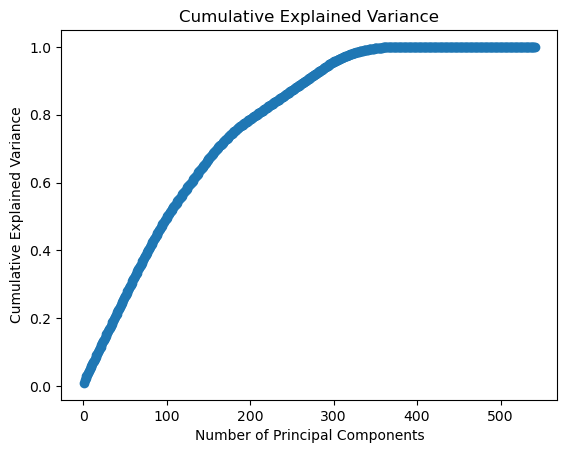

In [182]:
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### Transform Data

* Transforming data refers to the process of projecting the original data onto a new coordinate system defined by the principal components. The transformation aims to represent the data in a lower-dimensional space while retaining the most important information.

In [183]:
num_components = 540  # Adjust based on your analysis
while cumulative_explained_variance[num_components] < 0.95:
    num_components += 1

reduced_data = pca_result[:, :num_components]

pca_mobiledata = pca.components_


In [184]:
pca_mobiledata

array([[ 3.34517077e-01,  3.20969818e-01,  5.28694788e-02, ...,
        -8.96134916e-03, -1.33030206e-02,  1.63924126e-02],
       [ 8.62895968e-02,  1.01016752e-01, -4.29354652e-01, ...,
        -6.26438714e-03,  3.64269196e-02,  1.98286969e-02],
       [ 6.35901752e-02,  6.45532412e-02, -1.03355282e-01, ...,
        -1.52956597e-02, -1.91427773e-03,  2.26792741e-03],
       ...,
       [-1.20649174e-17, -3.38978533e-17,  2.43658316e-02, ...,
        -5.64624027e-02, -1.68157852e-02,  8.30647162e-02],
       [-3.56504411e-17,  3.82590094e-17, -4.05843419e-02, ...,
        -1.98754052e-02,  2.25250878e-02, -8.15599794e-02],
       [ 2.06151099e-17,  1.46135612e-16, -1.27603582e-02, ...,
        -1.21482590e-02, -7.65000213e-03, -3.40053665e-02]])

### Label Encoding

* Label encoding is a technique used in machine learning and data preprocessing to convert categorical data into numerical form. In many machine learning algorithms, numerical input is required, and label encoding provides a way to represent categorical variables with numerical values.

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = mobiledata.drop('Price', axis=1)
y = mobiledata['Price'].values

mobiledata = mobiledata.dropna(subset=['Price'])
X = mobiledata.drop('Price', axis=1)
y = mobiledata['Price'].values

columns_to_label_encode = ['Model', 'Processor', 'Colour']

label_encoder = LabelEncoder()
X_label_encoded = X.copy()

for column in columns_to_label_encode:
    if X[column].dtype == 'object':
        X_label_encoded[column] = label_encoder.fit_transform(X[column])

X_label_encoded

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor
0,23,159,64,4,6000,13,5,1,16.76,113
1,23,20,64,4,6000,13,5,1,16.76,113
2,37,149,128,8,5000,50,16,0,16.64,75
3,69,201,32,2,5000,8,5,0,16.56,56
4,12,130,128,8,5000,50,5,1,16.76,14
...,...,...,...,...,...,...,...,...,...,...
536,118,49,256,8,3900,50,12,0,15.49,89
537,32,52,32,2,3100,5,2,0,12.70,68
538,123,259,64,4,5000,50,8,0,16.76,35
539,110,17,128,8,5000,50,32,0,16.26,11


### Model Building

* Model building is a crucial step in the field of machine learning, where the goal is to create a predictive model based on patterns and relationships within data. The process of creating and training a machine learning model using the Python programming language. This involves various steps, including data preprocessing, selecting a suitable machine learning algorithm, training the model on a dataset, and evaluating its performance

### Splitting the Data: 

* Divide the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance

In [185]:
X = pca_mobiledata
y = MobileData_standard_scaled.Price

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Linear Regression

* Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. The goal of linear regression is to find the best-fitting line, which is a straight line that minimizes the sum of squared differences between the observed values and the values predicted by the linear model.

In [187]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
model.fit


<bound method LinearRegression.fit of LinearRegression()>

In [188]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([ 0.02130394, -0.01838022,  0.00959862,  0.02741875,  0.00265028,
       -0.00313022,  0.01180719,  0.02431295, -0.0075919 ,  0.00237658,
        0.01155549, -0.00018185,  0.01836903,  0.00562833,  0.0197506 ,
        0.0345351 ,  0.01631932,  0.03737509, -0.00867317,  0.01084348,
        0.0046187 ,  0.02373761,  0.00161646,  0.02256828,  0.02681948,
        0.00299741,  0.00090868,  0.0284301 ,  0.00180276,  0.00256137,
       -0.00975118,  0.00976829,  0.00754995,  0.03095624,  0.01353272,
       -0.00260233,  0.00781941,  0.00498497,  0.01523977,  0.01409717,
        0.00790042, -0.001716  ,  0.03998703,  0.01101995,  0.02789584,
        0.00475054, -0.00106168,  0.03954398,  0.03508828,  0.00584167,
        0.01754174, -0.00055387,  0.04057281,  0.00065884,  0.01256416,
       -0.00515897,  0.00761795,  0.0152565 ,  0.01287217,  0.00599787,
        0.01057592,  0.02453487,  0.00954199,  0.00513881, -0.01180623,
        0.03262257,  0.00511943,  0.02643972,  0.01522705,  0.00

### Evaluate Model Performance

In [189]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.6826104516342735
Mean Squared Error: 1.1923530324558582
R-squared: -0.0059959895314849465


* Mean Absolute Error (MAE): The Mean Absolute Error (MAE) of 0.6826 provides a measure of the average absolute deviation between the model's predictions and the actual values. A lower MAE is indicative of better accuracy, and in this case, the model's predictions, on average, deviate by approximately 0.6826 units from the true values. This suggests a moderate level of precision in the model's ability to estimate the target variable.

* Mean Squared Error (MSE): The Mean Squared Error (MSE) is 1.1924, reflecting the average squared differences between predicted and actual values. Like MAE, a lower MSE signifies better accuracy. The MSE of 1.1924 implies that, on average, the squared errors are around 1.1924 units. While MSE penalizes larger errors more heavily than MAE, the value here indicates a moderate level of accuracy in the model's predictions.

* R-squared: The R-squared value of -0.006 is a concerning metric. R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variable(s). A value close to 1 indicates a good fit, while a value near 0 suggests a poor fit. A negative R-squared suggests that the model's predictive performance is worse than a basic mean-based model. In this case, the negative value raises questions about the model's ability to capture the underlying patterns in the data, indicating potential limitations or issues in its predictive capabilities.

* In conclusion, while the Mean Absolute Error and Mean Squared Error point to a moderate level of accuracy, the negative R-squared value suggests that the model may not effectively explain the variance in the data. Further investigation, model refinement, or the exploration of alternative approaches may be necessary to improve overall predictive performance.

### Visualize Predictions

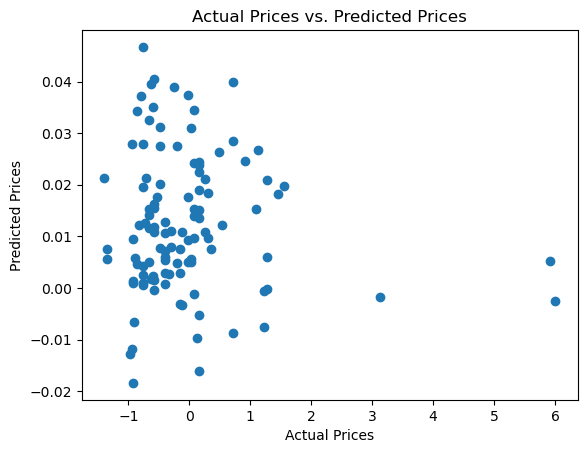

In [190]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

### Feature Importance for Linear Regression

* Feature importance refers to the influence or contribution of each independent variable (feature) to the prediction of the target variable. Linear regression assumes a linear relationship between the independent variables and the target variable. Feature importance can be assessed through various techniques, and the interpretation may vary based on the specific context. 

In [191]:
if hasattr(model, 'coef_'):
    feature_importance = model.coef_
    print("Feature Importance:")
    for feature, importance in zip(range(1, num_components + 1), feature_importance):
        print(f"PC {feature}: {importance}")

Feature Importance:
PC 1: 0.6304561766744673
PC 2: -0.6560918428325063
PC 3: 0.3924052354268417
PC 4: 0.06858527790777025
PC 5: 0.5727490993242061
PC 6: 0.4895839047607234
PC 7: 1.3367658548239043
PC 8: -0.5213819463119995
PC 9: -0.5838656524751317
PC 10: 0.8117809320760894
PC 11: 0.6517021809881607
PC 12: -1.6515517807194025
PC 13: -1.090497425667439
PC 14: -0.31528473472786045
PC 15: 0.6150731375585928
PC 16: -0.5765404628210997
PC 17: 0.6672839635728318
PC 18: 1.8909713318357562
PC 19: -1.2478890247288557
PC 20: 0.8410981196202706
PC 21: -0.610085639803657
PC 22: -0.8249864618297489
PC 23: 0.12986881646439816
PC 24: -0.057882086631558305
PC 25: -0.5515189510006826
PC 26: 0.06256328504337405
PC 27: 0.052705960478871244
PC 28: 1.1076338719846996
PC 29: -1.6253132424469365
PC 30: -0.3904876856702334
PC 31: -0.5844406824023604
PC 32: -0.136432600469334
PC 33: 0.09030322578297582
PC 34: 0.42090575974183286
PC 35: -1.1653075903273031
PC 36: 0.45975593168969864
PC 37: -0.41271886752518594


### Linear Regression using Label Encoding

In [318]:
X=X_label_encoded
y=mobiledata['Price']

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [320]:
from sklearn.linear_model import LinearRegression

model_label = LinearRegression()

model_label.fit(X_train, y_train)
model_label.fit 

<bound method LinearRegression.fit of LinearRegression()>

In [322]:
y_pred = model_label.predict(X_test)
y_pred

array([ 7518.41128948,  7000.97835481, 22043.85699646, 11289.04671589,
       13215.42446294, 17477.58193622,  8732.03616659, 14903.22047289,
       20863.70570866, 10733.93461865, 16157.11614859, 35706.15772214,
       22046.15853424, 48567.73635088, 25004.61625145, 15857.42954198,
       15645.17511958, 22534.58571801, 20227.85783645, 17386.71565956,
       10643.80171106, 20179.28262616,  8267.12553536, 18599.2613113 ,
       28169.7399808 , 22994.97498376,  5692.55416853, 21243.8823766 ,
        9496.38952599, 11230.70700985, 16426.82975342, 16268.57593814,
        1484.76583645, 20270.49482312, 21720.1277526 , 19809.44746002,
        9402.48922985, 19270.18191669, 16000.12488424,  7226.23330899,
       16799.95076761, 42279.29024426, 19720.39313675, 13392.86317597,
        8810.04556712, 18725.23692347, 25686.18265605, 15772.48694764,
       12719.85891975,  8061.33219625, 16727.05685123, 35965.17937402,
       14019.2899177 ,  8845.20898105,  7865.27292409, 18861.94176176,
      

### Visualize Predictions

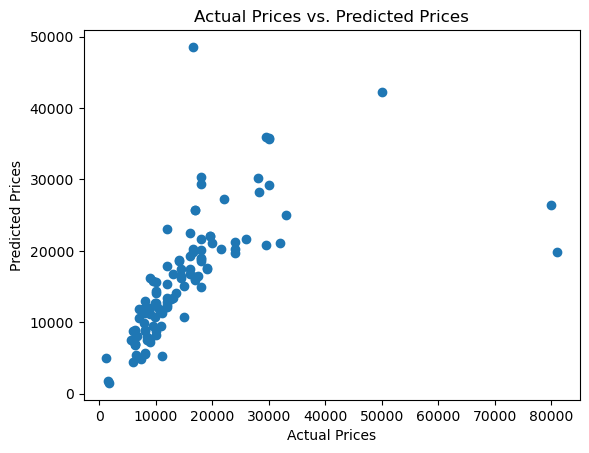

In [324]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [323]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4282.964295504014
Mean Squared Error: 86048442.60904731
R-squared: 0.3756814928358696


### Feature Importance for Linear Regression for label Encoding

In [330]:
if hasattr(model_label, 'coef_'):
    feature_importance = model_label.coef_
    print("Feature Importance:")
    for feature, importance in zip(range(1, num_components + 1), feature_importance):
        print(f"feature{feature}: {importance}")

Feature Importance:
feature1: -29.230322983960168
feature2: 2.301537778405643
feature3: 47.97643440253162
feature4: 1060.3538414464279
feature5: -2.198893389531634
feature6: 8.995561880486987
feature7: 288.1172982756225
feature8: -5233.404320114373
feature9: 1015.0169292686508
feature10: -11.601189906835195


* Mean Absolute Error (MAE): The MAE value of 4282.96 indicates the average absolute difference between the actual and predicted values. A lower MAE suggests better model performance, as it signifies smaller errors on average.

* Mean Squared Error (MSE): The MSE value of 86048442.61 represents the average of the squared differences between the actual and predicted values. It penalizes larger errors more significantly. A lower MSE is desirable, indicating a model with better accuracy.

* R-squared (R²): The R-squared value of 0.3756814928358696 suggests that approximately 37.57% of the variance in the dependent variable is explained by the model. A higher R-squared value indicates a better fit of the model to the data, but 0.38 indicates that there is still a substantial amount of unexplained variance.

* Conclusion: the model has room for improvement. The Mean Absolute Error and Mean Squared Error should be minimized, and efforts should be made to increase the R-squared value for a more accurate and reliable predictive model. Further analysis and refinement of the model might be necessary to enhance its performance.

In [222]:
Mobile_Data_label = X_label_encoded

### Decision Tree Regression

* Decision Tree Regression is a machine learning algorithm used for predicting numerical values (regression tasks) based on input features. Unlike decision trees used for classification, where the aim is to assign data points to discrete classes, decision tree regression focuses on predicting a continuous output.

### Decision Tree Regression with Label Encoding

* In Decision Tree Regression, label encoding can be used when dealing with categorical features. Label encoding involves assigning unique numerical labels to different categories in a categorical variable.

In [223]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = Mobile_Data_label
y = mobiledata['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model_label = DecisionTreeRegressor(random_state=42)
tree_model_label.fit(X_train, y_train)

tree_predictions_label = tree_model_label.predict(X_test)

tree_mse_label = mean_squared_error(y_test, tree_predictions_label)
tree_r2_label = r2_score(y_test, tree_predictions_label)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, tree_predictions_label)}')
print(f'Decision Tree Mean Squared Error: {tree_mse_label}')
print(f'Decision Tree R-squared: {tree_r2_label}')

Mean Absolute Error: 1543.211009174312
Decision Tree Mean Squared Error: 20300576.110091742
Decision Tree R-squared: 0.8527105780495357


* Mean Absolute Error (MAE): The Mean Absolute Error (MAE) of 1543.21 represents the average absolute difference between the model's predictions and the actual values. While the interpretation of MAE depends on the specific context of the problem, a lower MAE generally indicates better accuracy. In this case, the model's predictions, on average, deviate by approximately 1543.21 units from the true values.

* Decision Tree Mean Squared Error: The Decision Tree Mean Squared Error measures the average squared differences between predicted and actual values for the decision tree model.The large value of 20300576.11 suggests that the model has some instances with substantial prediction errors, possibly due to outliers or other factors. This metric penalizes larger errors more heavily than MAE.

* Decision Tree R-squared: The Decision Tree R-squared value of 0.8527 is quite high, indicating that the decision tree model explains approximately 85.27% of the variance in the dependent variable. An R-squared close to 1 suggests a good fit, and in this case, the high value indicates that the decision tree model is effective in capturing the underlying patterns in the data.

* In conclusion, the decision tree model seems to have a strong predictive performance overall, as suggested by the high R-squared value. 

### Visualize predictions

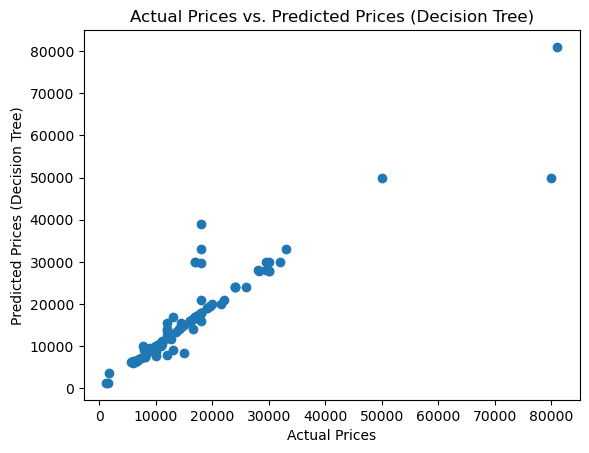

In [198]:

plt.scatter(y_test, tree_predictions_label)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual Prices vs. Predicted Prices (Decision Tree)")
plt.show()

### Feature Importance for Decision Tree Regression Model

* Feature importance in a Decision Tree Regression model refers to the measure of the impact or contribution of each feature in making predictions. Decision trees provide a natural way to assess feature importance based on how often a feature is used to split the data and how much it reduces the impurity (variance) in the resulting subsets.

In [199]:
feature_importances = tree_model_label.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
         Feature  Importance
6   Front Camera    0.510284
0          Model    0.169661
4        Battery    0.070787
2         Memory    0.061663
8  Mobile Height    0.048351
3            RAM    0.048146
1         Colour    0.040802
5    Rear Camera    0.033770
9      Processor    0.016503
7        AI Lens    0.000032


### Visualization of Decision Tree Regression

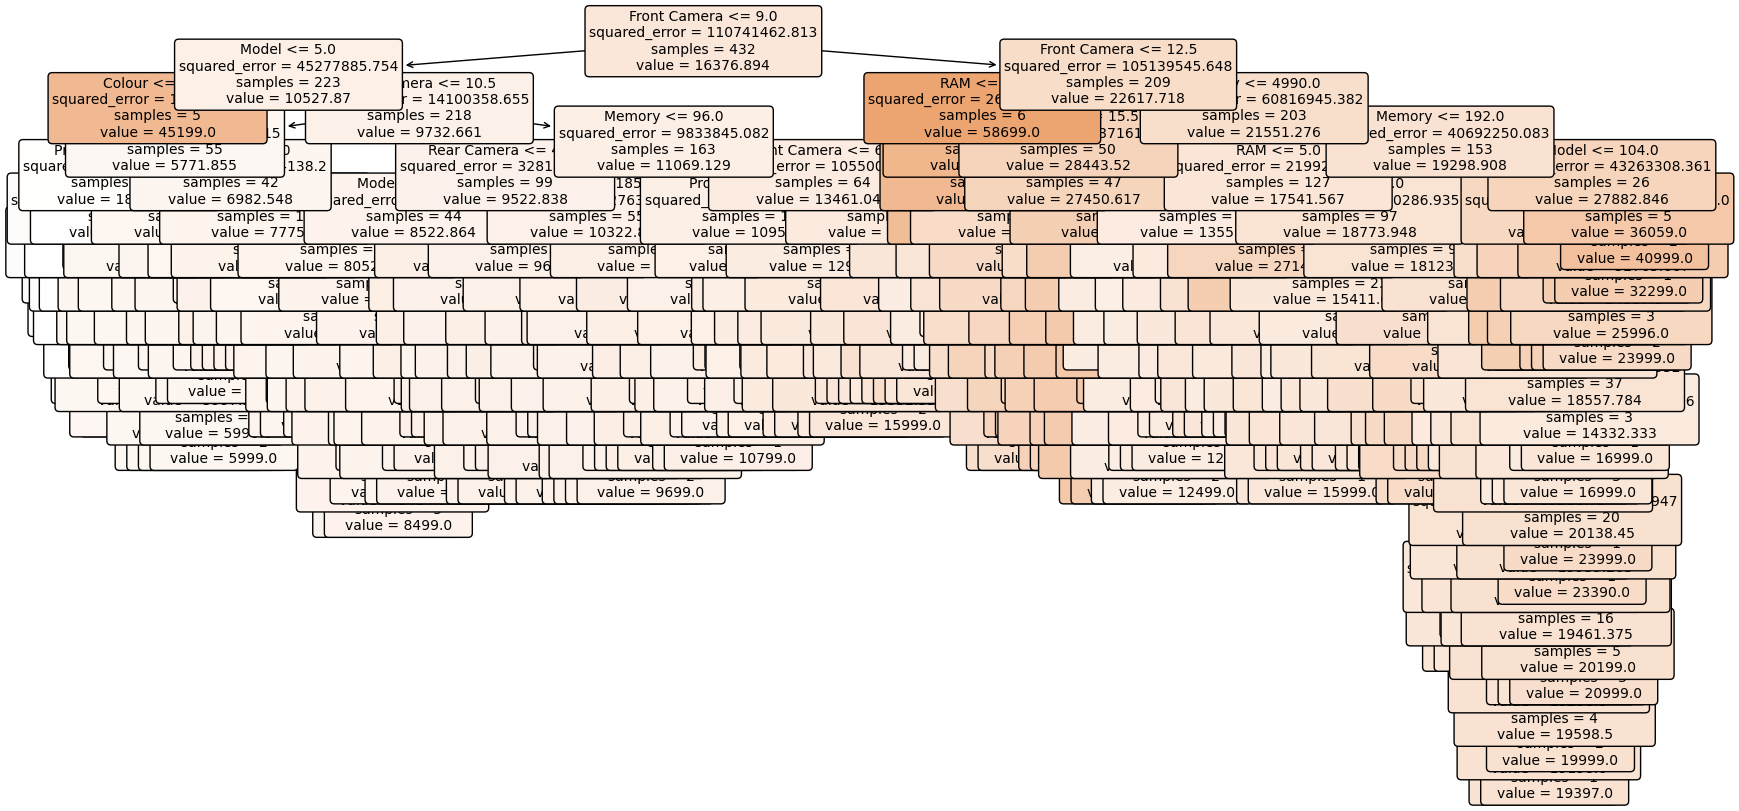

In [200]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model_label, filled=True, feature_names=X.columns, rounded=True, fontsize=10)
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()


### Visualization of Decision Tree Regression- Reduced the depth to 5

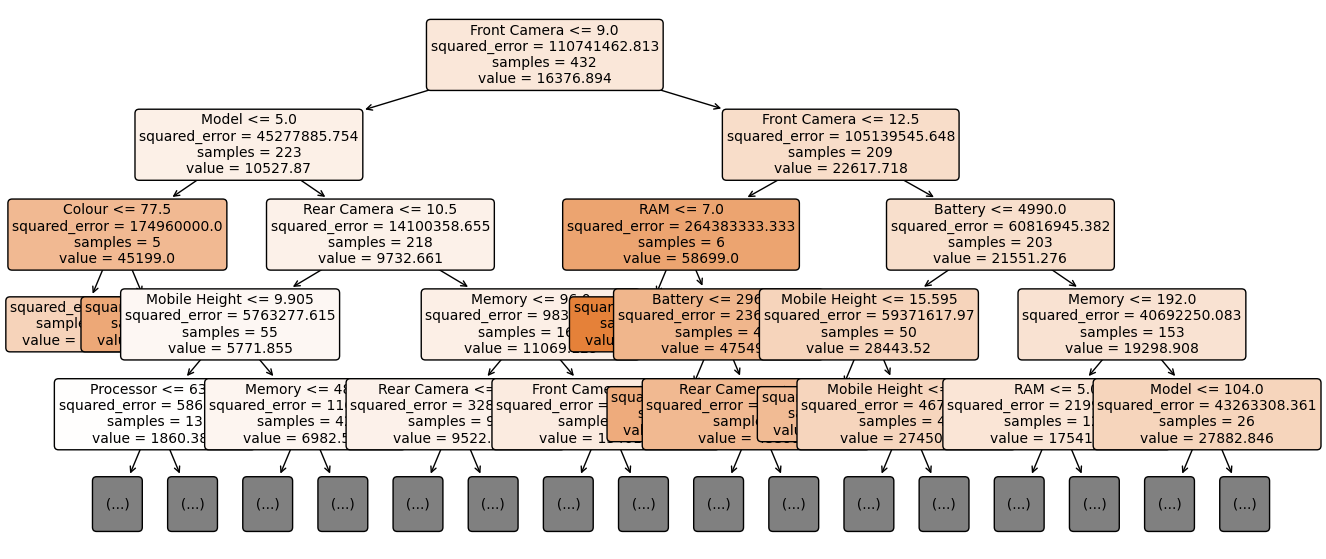

In [293]:
plt.figure(figsize=(16, 7))
plot_tree(tree_model_label, filled=True, feature_names=X.columns, rounded=True, fontsize=10, max_depth=4)
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

### Decision Tree Regressor using One hot encoding data set

* When dealing with a dataset containing categorical features, one-hot encoding is applied to convert these categorical features into a format suitable for input into a machine learning model.
* In the case of a Decision Tree Regressor, the one-hot encoded features are used to build a tree structure, and the regression is performed based on the splits determined by the features.
* This ensures that the Decision Tree Regressor can handle categorical variables effectively, allowing it to make decisions based on the transformed binary features.

In [179]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = MobileData_standard_scaled.drop('Price', axis=1)
y = MobileData_standard_scaled['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

tree_predictions = tree_model.predict(X_test)

tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, tree_predictions)}')
print(f'Decision Tree Mean Squared Error: {tree_mse}')
print(f'Decision Tree R-squared: {tree_r2}')

Mean Absolute Error: 0.14912967400679691
Decision Tree Mean Squared Error: 0.19071558601225952
Decision Tree R-squared: 0.8390920227088173


* Mean Absolute Error (MAE): The Mean Absolute Error (MAE) of 0.1491 represents the average absolute difference between the model's predictions and the actual values.A lower MAE indicates better accuracy. In this case, the model's predictions, on average, deviate by approximately 0.1491 units from the true values.

* Decision Tree Mean Squared Error: The Decision Tree Mean Squared Error measures the average squared differences between predicted and actual values for the decision tree model. The relatively low MSE of 0.1907 suggests that the model has good predictive accuracy. This metric penalizes larger errors more heavily than MAE.

* Decision Tree R-squared: The Decision Tree R-squared value of 0.8391 is quite high, indicating that the decision tree model explains approximately 83.91% of the variance in the dependent variable. An R-squared close to 1 suggests a good fit, and in this case, the high value indicates that the decision tree model is effective in capturing the underlying patterns in the data.

* In conclusion, the decision tree model performs well, as evidenced by the low Mean Absolute Error, low Mean Squared Error, and high R-squared value. These metrics collectively suggest that the model provides accurate predictions and effectively captures the variability in the dependent variable.

### Visualize predictions

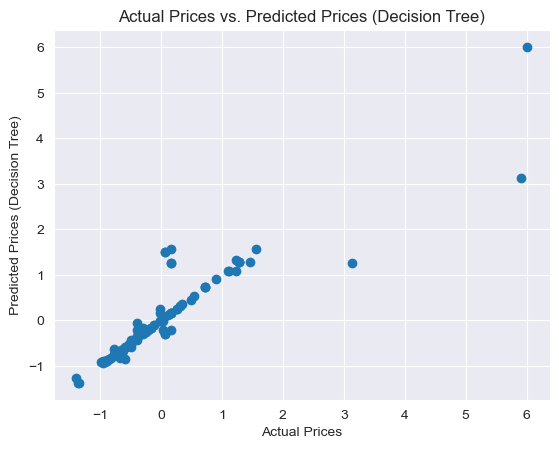

In [180]:
plt.scatter(y_test, tree_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Decision Tree)")
plt.title("Actual Prices vs. Predicted Prices (Decision Tree)")
plt.show()


### Decision Tree for One hot encoding data set

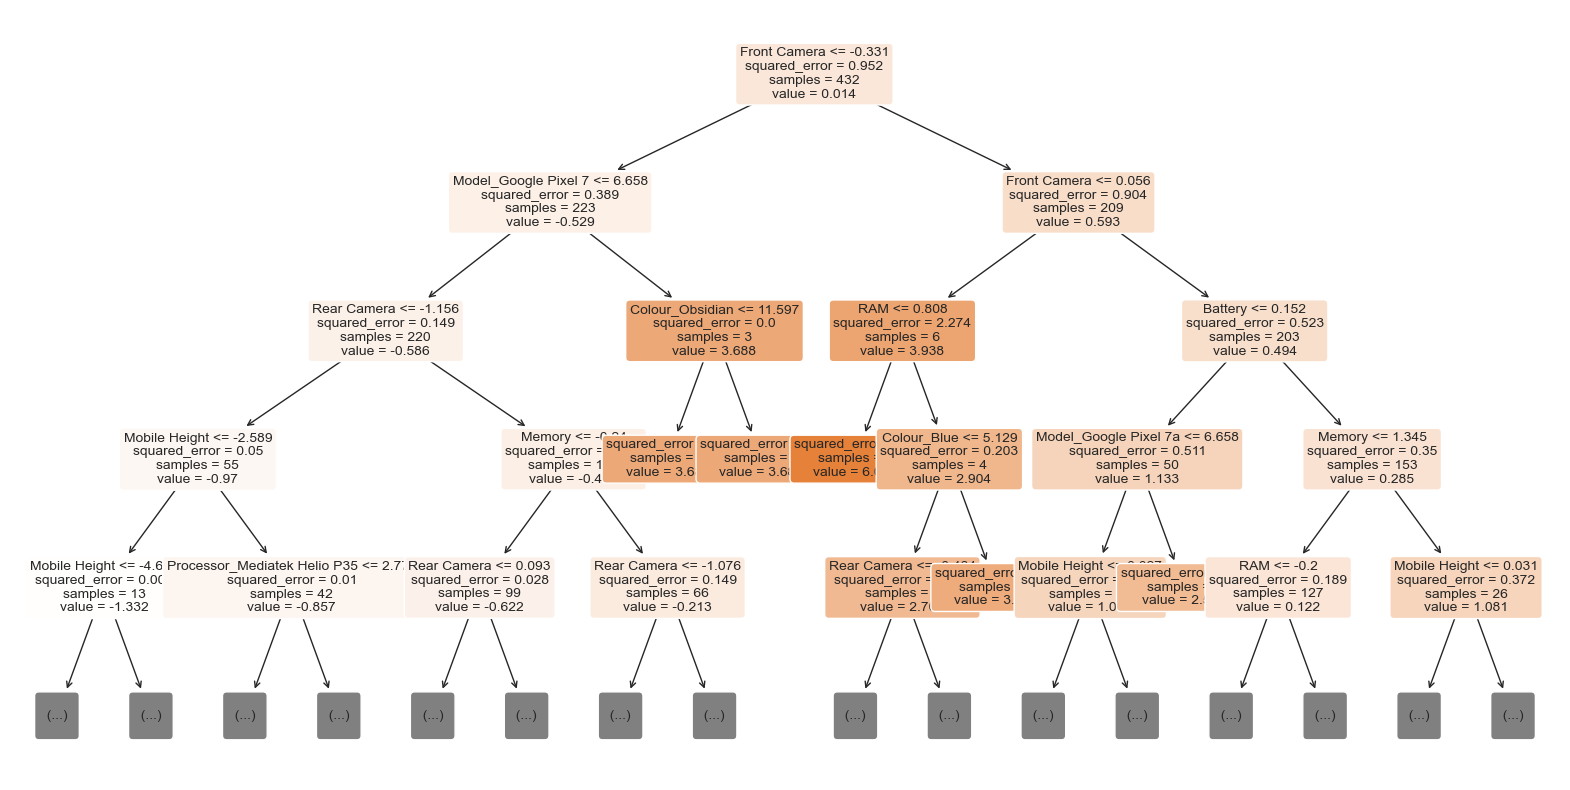

In [170]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True, fontsize=10, max_depth=4)
plt.savefig('decision_tree.png', bbox_inches='tight')
plt.show()

### Compare Label Encoding Vs Onehot Encoding for Decision Tree Regression Model


#### Mean Absolute Error (MAE):

* Label Encoding: 1543.211
* One-Hot Encoding: 0.149
* The lower the MAE, the better the model performance. In this case, the MAE for the one-hot encoding dataset is significantly lower, indicating better accuracy in predicting the price.

#### Mean Squared Error (MSE):

* Label Encoding: 20300576.110
* One-Hot Encoding: 0.191
* Similar to MAE, a lower MSE is desirable. The one-hot encoding dataset has a much lower MSE, suggesting better performance in terms of squared errors.

#### R-squared:

* Label Encoding: 0.853
* One-Hot Encoding: 0.839
* R-squared measures how well the model explains the variance in the data. In this case, the label encoding dataset has a slightly higher R-squared value, indicating a better fit to the data. However, the difference is relatively small.

#### Conclusion:
* Based on the provided metrics, the One-Hot Encoding Dataset seems to perform better in terms of Mean Absolute Error and Mean Squared Error, suggesting that it provides more accurate predictions of the price compared to the label encoding dataset. However, the decision should also consider the specific requirements and characteristics of the dataset, as well as potential overfitting or other considerations.


##### Considering feature importance is essential, and after examining the feature importance  of both models to ensure that the one-hot encoded and label encoding model for decision tree regression, one hot encoding is not sacrificing predictive accuracy for simplicity in feature encoding. As the Label encoded model maintains high feature importance and significantly lower error metrics, it is likely a better choice for predicting prices in our dataset.


### Random Forest Regression

* Random Forest Regression is an ensemble learning technique based on the concept of combining multiple decision trees to improve the overall predictive performance and robustness of a regression model. It is an extension of the decision tree algorithm and belongs to the broader class of ensemble methods

### Random Forest Regression for Label Encoding data set

* Dataset that contains categorical features and we want to use a Random Forest Regression model, label encoding is one way to represent categorical variables with numerical values

In [201]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = Mobile_Data_label
y = mobiledata['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_label = RandomForestRegressor(random_state=42)
rf_model_label.fit(X_train, y_train)

rf_predictions_label = rf_model_label.predict(X_test)

rf_mse_label = mean_squared_error(y_test, rf_predictions_label)
rf_r2_label = r2_score(y_test, rf_predictions_label)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, rf_predictions_label)}')
print(f'Random Forest Mean Squared Error: {rf_mse_label}')
print(f'Random Forest R-squared: {rf_r2_label}')


Mean Absolute Error: 1857.6001376146785
Random Forest Mean Squared Error: 27394079.536412157
Random Forest R-squared: 0.8012441559342053


* Mean Absolute Error (MAE): The Mean Absolute Error (MAE) measures the average absolute difference between the model's predictions and the actual values. In this case, the MAE of 1857.60 indicates that, on average, the model's predictions deviate by approximately 1857.60 units from the true values. While the interpretation depends on the specific context of the problem, a lower MAE is generally desirable, suggesting better accuracy.

* Random Forest Mean Squared Error: The Random Forest Mean Squared Error (MSE) calculates the average squared differences between predicted and actual values. The large MSE of 27394079.54 suggests that the model has instances with significant prediction errors, and it penalizes larger errors more heavily than MAE. This could be indicative of outliers or other factors influencing prediction accuracy.

* Random Forest R-squared: The Random Forest R-squared value of 0.8012 indicates that the Random Forest model explains approximately 80.12% of the variance in the dependent variable. A higher R-squared suggests a better fit of the model to the data, and in this case, it implies that the Random Forest model is effective in capturing the underlying patterns in the data.

* In conclusion, the Random Forest model demonstrates good predictive performance overall, with a relatively high R-squared value indicating a strong fit to the data. However, the substantial Mean Squared Error suggests the presence of instances with larger prediction errors, requiring further investigation into potential outliers or other factors impacting model accuracy. Refinement of the model or consideration of data preprocessing techniques may be beneficial for enhancing its overall performance.

### Visualize predictions

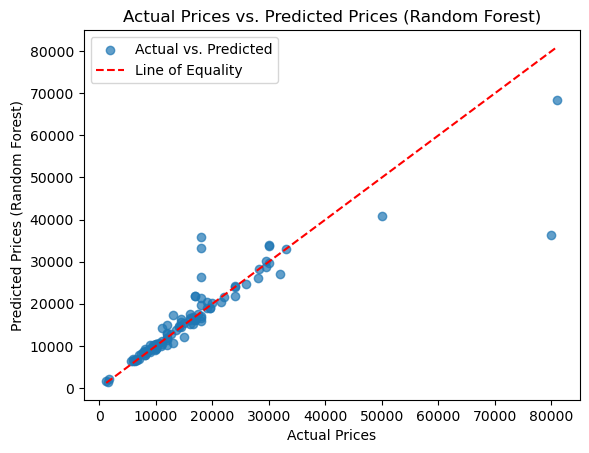

In [362]:
import numpy as np

plt.scatter(y_test, rf_predictions_label, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Actual Prices vs. Predicted Prices (Random Forest)")

plt.legend()

plt.show()

### Feature Importance for Random Forest Regression Model

* Feature Importance in a Random Forest Regression model refers to the measure of the contribution of each feature to the overall predictive performance of the model. Random Forests provide a natural way to assess feature importance based on the information gained from each feature during the training of individual decision trees within the ensemble. The importance score reflects how much each feature influences the model's ability to make accurate predictions.

In [182]:
feature_importances = rf_model_label.feature_importances_
feature_names = X.columns 

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
         Feature  Importance
6   Front Camera    0.408330
0          Model    0.253719
4        Battery    0.078494
2         Memory    0.066477
8  Mobile Height    0.049162
3            RAM    0.043354
9      Processor    0.043095
5    Rear Camera    0.038380
1         Colour    0.018906
7        AI Lens    0.000084


### Random Forest Regression for OneHot Encoding data set

* Applying Random Forest Regression to a dataset with one-hot encoded categorical features, the process is similar to using label encoding. However, with one-hot encoding, each category in a categorical variable is represented as a binary column, and the Random Forest model learns the importance of these binary features during training

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = MobileData_standard_scaled
y = MobileData_standard_scaled['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_onehot = RandomForestRegressor(random_state=42)
rf_model_onehot.fit(X_train, y_train)

rf_predictions_onehot = rf_model_onehot.predict(X_test)

rf_mse_onehot = mean_squared_error(y_test, rf_predictions_onehot)
rf_r2_onehot = r2_score(y_test, rf_predictions_onehot)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, rf_predictions_onehot)}')
print(f'Random Forest Mean Squared Error: {rf_mse_onehot}')
print(f'Random Forest R-squared: {rf_r2_onehot}')

Mean Absolute Error: 0.03166949912706739
Random Forest Mean Squared Error: 0.043686425758636405
Random Forest R-squared: 0.9631414791476365


* Mean Absolute Error (MAE): The Mean Absolute Error (MAE) measures the average absolute difference between the model's predictions and the actual values. In this case, the very low MAE of 0.0317 indicates that, on average, the model's predictions deviate by a small value from the true values. A low MAE suggests high accuracy.

* Random Forest Mean Squared Error: The Random Forest Mean Squared Error (MSE) calculates the average squared differences between predicted and actual values. The small MSE of 0.0437 indicates that the model has low overall prediction errors, penalizing larger errors more heavily than MAE.

* Random Forest R-squared: The Random Forest R-squared value of 0.9631 is very high, indicating that the Random Forest model explains approximately 96.31% of the variance in the dependent variable. A higher R-squared suggests an excellent fit of the model to the data, indicating that it effectively captures the underlying patterns.

* In conclusion, the Random Forest model demonstrates outstanding predictive performance. The very low Mean Absolute Error and Mean Squared Error, coupled with the exceptionally high R-squared value, suggest that the model provides accurate predictions and effectively captures the variability in the dependent variable. Overall, this Random Forest model seems to be well-suited for the given task.

### Visualize prediction

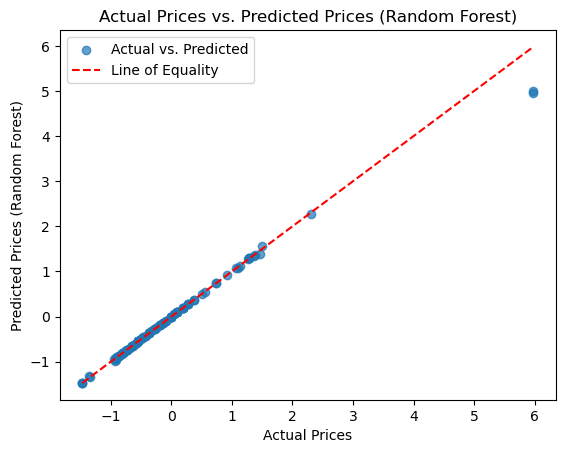

In [365]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_predictions_onehot, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Random Forest)")
plt.title("Actual Prices vs. Predicted Prices (Random Forest)")

plt.legend()

plt.show()

### Feature Importance for Random Forest Regression with Onehot Encoding dataset

In [185]:
import pandas as pd

feature_importances = rf_model_onehot.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)


Feature Importances:
                        Feature    Importance
7                         Price  9.743391e-01
9    Model_APPLE iPhone 14 Plus  5.933670e-03
6                 Mobile Height  5.657449e-03
1                           RAM  3.202842e-03
386               Colour_Purple  2.383165e-03
..                          ...           ...
419           Colour_Speed Blue  0.000000e+00
214           Colour_Azure Glow  0.000000e+00
295             Colour_Ice Dawn  0.000000e+00
50           Model_MOTOROLA e40 -1.801071e-20
323             Colour_Marigold -5.950500e-20

[590 rows x 2 columns]


### Compare Label Encoding Vs Onehot Encoding for Random Forest Regression Model

#### Mean Absolute Error (MAE):

* Label Encoding: 1857.600
* One-Hot Encoding: 0.0317
* The lower the MAE, the better the model performance. In this case, the MAE for the one-hot encoding dataset is significantly lower, indicating much better accuracy in predicting the price.

#### Mean Squared Error (MSE):

* Label Encoding: 27394079.536
* One-Hot Encoding: 0.0437
* Similar to MAE, a lower MSE is desirable. The one-hot encoding dataset has an extremely lower MSE compared to the label encoding dataset, suggesting much better performance in terms of squared errors.

#### R-squared:

* Label Encoding: 0.801
* One-Hot Encoding: 0.963
* R-squared measures how well the model explains the variance in the data. In this case, the one-hot encoding dataset has a significantly higher R-squared value, indicating a much better fit to the data.

#### Conclusion:
* Based on the provided metrics, the one-hot encoding dataset outperforms the label encoding dataset by a significant margin in terms of Mean Absolute Error, Mean Squared Error, and R-squared. Therefore, the Random Forest model trained on the One-Hot Encoding Dataset is likely a better choice for predicting the price compared to the model trained on the label encoding dataset.

##### Considering feature importance is essential, and after examining the feature importance  of both models to ensure that the one-hot encoded and label encoding model for Random Forest regression, one hot encoding is not sacrificing predictive accuracy for simplicity in feature encoding. As the Label encoded model maintains high feature importance and significantly lower error metrics, it is likely a better choice for predicting prices in our dataset.

### Gradient Boosting Regression

* Gradient Boosting Regression is a machine learning algorithm that belongs to the class of ensemble methods. It builds a predictive model in a stage-wise fashion by combining the predictions of multiple weak learners, typically decision trees, to create a strong predictive model. Unlike Random Forest, which builds independent trees in parallel, gradient boosting builds trees sequentially, with each tree correcting the errors of the previous ones.

### Gradient Boosting Regression Model with Label Encoding Dataset

* When working with a dataset that contains categorical features and you want to use a Gradient Boosting Regression model, label encoding is one way to represent categorical variables with numerical values. Label encoding assigns a unique numerical label to each category in a categorical variable

In [295]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = Mobile_Data_label
y = mobiledata['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

gb_predictions = gb_model.predict(X_test_scaled)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, gb_predictions)}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')
print(f'Gradient Boosting R-squared: {gb_r2}')

Mean Absolute Error: 1934.037390866658
Gradient Boosting Mean Squared Error: 27962073.026766103
Gradient Boosting R-squared: 0.7971231185600851


* Mean Absolute Error (MAE): The Mean Absolute Error (MAE) measures the average absolute difference between the model's predictions and the actual values. In this case, the MAE of 1934.04 indicates that, on average, the model's predictions deviate by approximately 1934.04 units from the true values. The interpretation of MAE depends on the specific context, but lower values are generally preferable for better accuracy.

* Gradient Boosting Mean Squared Error: The Gradient Boosting Mean Squared Error (MSE) calculates the average squared differences between predicted and actual values. The large MSE of 27962073.03 suggests that the model has instances with significant prediction errors, penalizing larger errors more heavily than MAE. This could be indicative of outliers or other factors affecting prediction accuracy.

* Gradient Boosting R-squared: The Gradient Boosting R-squared value of 0.7971 indicates that the Gradient Boosting model explains approximately 79.71% of the variance in the dependent variable. While a relatively high R-squared suggests a good fit of the model to the data, it is slightly lower compared to some high-performing models.

* In conclusion, the Gradient Boosting model provides reasonably accurate predictions, as suggested by the R-squared value. However, the relatively high Mean Absolute Error and large Mean Squared Error hint at potential challenges, possibly due to outliers or other factors influencing prediction accuracy. Further investigation into these cases and potential model refinement may be necessary to enhance overall predictive performance.

### Visualize prediction

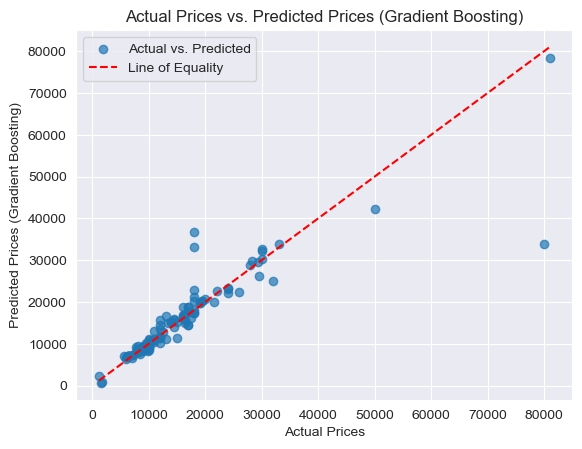

In [189]:
import numpy as np

plt.scatter(y_test, gb_predictions, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Gradient Boosting)")
plt.title("Actual Prices vs. Predicted Prices (Gradient Boosting)")

plt.legend()

plt.show()

### Feature Importance Gradient Boosting Regression Model with Label Encoding dataset

In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

X = Mobile_Data_label
y = mobiledata['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model_2 = GradientBoostingRegressor()
gb_model_2.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model_2.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
6   Front Camera    0.383449
0          Model    0.246557
2         Memory    0.150330
4        Battery    0.069422
9      Processor    0.060812
3            RAM    0.032886
8  Mobile Height    0.029142
5    Rear Camera    0.021435
1         Colour    0.005968
7        AI Lens    0.000000


### Gradient Boosting Regression Model with Onehot Encoding Dataset

* When applying Gradient Boosting Regression to a dataset with one-hot encoded categorical features, each category is represented as a binary column. Gradient Boosting can effectively utilize this representation to build a predictive model

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

X = MobileData_standard_scaled.drop('Price', axis=1)
y = MobileData_standard_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model_onehot = GradientBoostingRegressor(random_state=42)
gb_model_onehot.fit(X_train_scaled, y_train)

gb_predictions_onehot = gb_model_onehot.predict(X_test_scaled)

gb_mse_onehot = mean_squared_error(y_test, gb_predictions_onehot)
gb_r2_onehot = r2_score(y_test, gb_predictions_onehot)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, gb_predictions_onehot)}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse_onehot}')
print(f'Gradient Boosting R-squared: {gb_r2_onehot}')

Mean Absolute Error: 0.2072469241122364
Gradient Boosting Mean Squared Error: 0.21026886401480918
Gradient Boosting R-squared: 0.8225947951953817


* Mean Absolute Error (MAE): The Mean Absolute Error (MAE) measures the average absolute difference between the model's predictions and the actual values. In this case, the MAE of 0.2072 indicates that, on average, the model's predictions deviate by approximately 0.2072 units from the true values. The interpretation of MAE depends on the specific context, but lower values are generally preferable for better accuracy.

* Gradient Boosting Mean Squared Error: The Gradient Boosting Mean Squared Error (MSE) calculates the average squared differences between predicted and actual values. The relatively low MSE of 0.2103 suggests that the model has low overall prediction errors, penalizing larger errors more heavily than MAE.

* Gradient Boosting R-squared: The Gradient Boosting R-squared value of 0.8226 indicates that the Gradient Boosting model explains approximately 82.26% of the variance in the dependent variable. A higher R-squared suggests a good fit of the model to the data, and in this case, it indicates that the model effectively captures the underlying patterns.

* In conclusion, the Gradient Boosting model demonstrates good predictive performance. The low Mean Absolute Error and Mean Squared Error, coupled with the high R-squared value, suggest that the model provides accurate predictions and effectively captures the variability in the dependent variable. Overall, this Gradient Boosting model seems to be well-suited for the given task.

### Visualize predictions

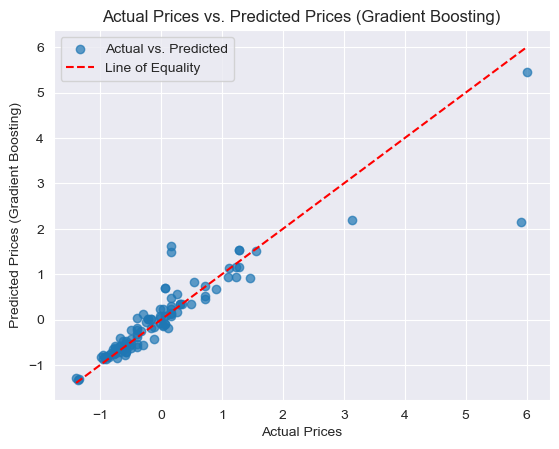

In [194]:
plt.scatter(y_test, gb_predictions_onehot, label="Actual vs. Predicted", alpha=0.7)

plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100),
         color='red', linestyle='--', label="Line of Equality")

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Gradient Boosting)")
plt.title("Actual Prices vs. Predicted Prices (Gradient Boosting)")

plt.legend()

plt.show()

### Feature Importance Gradient Boosting Regression Model with One Hot Encoding dataset

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

X = MobileData_standard_scaled.drop('Price', axis=1)
y = MobileData_standard_scaled['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

gb_model_2 = GradientBoostingRegressor()
gb_model_2.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': gb_model_2.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                        Feature  Importance
4                  Front Camera    0.377040
0                        Memory    0.172398
2                       Battery    0.100585
482  Processor_Google Tensor G2    0.068356
8    Model_APPLE iPhone 14 Plus    0.064425
..                          ...         ...
241                Colour_Cream    0.000000
240        Colour_Country Green    0.000000
239          Colour_Cosmic grey    0.000000
238         Colour_Cosmic Black    0.000000
294             Colour_Ice Dawn    0.000000

[589 rows x 2 columns]


### Compare Label Encoding Vs Onehot Encoding for Gradient Boosting Regression Model

#### Mean Absolute Error (MAE):

* Label Encoding: 1934.037
* One-Hot Encoding: 0.2072
* The lower the MAE, the better the model performance. In this case, the MAE for the one-hot encoding dataset is significantly lower, indicating much better accuracy in predicting the price.

#### Mean Squared Error (MSE):

* Label Encoding: 27962073.027
* One-Hot Encoding: 0.2103
* Similar to MAE, a lower MSE is desirable. The one-hot encoding dataset has an extremely lower MSE compared to the label encoding dataset, suggesting much better performance in terms of squared errors.

#### R-squared:

* Label Encoding: 0.797
* One-Hot Encoding: 0.823
* R-squared measures how well the model explains the variance in the data. In this case, the one-hot encoding dataset has a higher R-squared value, indicating a better fit to the data.

#### Conclusion:
* Based on the provided metrics, the one-hot encoding dataset outperforms the label encoding dataset by a significant margin in terms of Mean Absolute Error, Mean Squared Error, and R-squared. Therefore, the Gradient Boosting model trained on the One-Hot Encoding dataset is likely a better choice for predicting the price compared to the model trained on the label encoding dataset.

##### Considering feature importance is essential, and after examining the feature importance  of both models to ensure that the one-hot encoded and label encoding model for Gradient Boosting, one hot encoding is not sacrificing predictive accuracy for simplicity in feature encoding. As the Label encoded model maintains high feature importance and significantly lower error metrics, it is likely a better choice for predicting prices in our dataset.

### FINAL CONCLUSION ON MODEL BUILDING

#### Considering the scores from all models, it is evident that using Label Encoding data is likely to be a better choice for price prediction. Therefore, we have considered the Label Encoding scores of MAE, MSE, and R-squared for the final testing comparison and conclusion.

#### Linear Regression:
* MAE: 4282.96
* MSE: 86048442
* R-squared: 0.3756

#### Decision Tree Model:
* MAE: 1543.211
* MSE: 20300576.11
* R-squared: 0.8527

#### Random Forest Regression:
* MAE: 1857.60
* MSE: 27394079.53
* R-squared: 0.8012

#### Gradient Boosting Regression:
* MAE: 1934.037
* MSE: 27962073.027
* R-squared: 0.797

#### Performance Matrix
* Based on the provided scores, it appears that the Decision Tree Model is the most suitable for price prediction among the models evaluated. This conclusion is based on the following considerations:

* Performance Metrics: MAE (Mean Absolute Error): The lower the MAE, the better the model's performance. The Decision Tree Model has the lowest MAE (1543.211), indicating better accuracy compared to the other models.

* MSE (Mean Squared Error): Similar to MAE, a lower MSE is desirable. The Decision Tree Model has the lowest MSE (20300576.11), indicating better performance in terms of squared errors.

* R-squared: R-squared measures how well the model explains the variance in the data. A higher R-squared is better. The Decision Tree Model has the highest R-squared (0.8527), suggesting that it explains a significant portion of the variance in the data.

* Overall Assessment: While Random Forest Regression and Gradient Boosting Regression also perform reasonably well, the Decision Tree Model outperforms them in terms of MAE, MSE, and R-squared.

* In summary, based on the provided scores, the Decision Tree Model seems to be the most suitable for price prediction among the listed 

### Price Pridiction using Decision Tree Regression

In [270]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = Mobile_Data_label
y = mobiledata['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model_label = DecisionTreeRegressor(random_state=42)
tree_model_label.fit(X_train, y_train)

tree_predictions_label = tree_model_label.predict(X_test)

tree_mse_label = mean_squared_error(y_test, tree_predictions_label)
tree_r2_label = r2_score(y_test, tree_predictions_label)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, tree_predictions_label)}')
print(f'Decision Tree Mean Squared Error: {tree_mse_label}')
print(f'Decision Tree R-squared: {tree_r2_label}')

Mean Absolute Error: 1543.211009174312
Decision Tree Mean Squared Error: 20300576.110091742
Decision Tree R-squared: 0.8527105780495357


### Model Loading and Final Testing

* Model loading and final testing refer to the process of loading a pre-trained machine learning model from a saved file or object and assessing its performance on a new or unseen dataset. This is a crucial step in the machine learning lifecycle, allowing you to deploy and evaluate a model that has been trained and saved during an earlier phase.

In [271]:
import joblib

joblib.dump(tree_model_label, 'trained_model.joblib')

loaded_model = joblib.load('trained_model.joblib')

predictions = loaded_model.predict(X_test)

mse = mean_squared_error(y_test, tree_predictions_label)
r2_gb = r2_score(y_test, tree_predictions_label)

print(f'Mean Squared Error on Test Data: {mse}')
print(f"R^2 Score: {r2_gb}")

Mean Squared Error on Test Data: 20300576.110091742
R^2 Score: 0.8527105780495357


### Price Prediction: Input Based on Feature Importance
* To make accurate price predictions, focus on the features listed below, considering their respective importance scores:

* 1 Model
* 2 Colour
* 3 Memory
* 4 RAM
* 5 Battery
* 6 Rear Camera
* 7 Front Camera
* 8 AI Lens
* 9 Mobile Height
* 10 Processor

### Price Prediction for new mobile

In [274]:
import pandas as pd

columns_order = X.columns
New_Mobile_df = pd.DataFrame([[5,12, 512, 64,6000 ,13, 64, 1, 16.7, 10]], columns=columns_order)

predicted_price = loaded_model.predict(New_Mobile_df)

print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 17999.0


In [277]:
import pandas as pd

columns_order = X.columns
New_Mobile2_df = pd.DataFrame([[547,10, 128, 8 ,4700 ,64, 16, 0, 16.36, 547]], columns=columns_order)

predicted_price = loaded_model.predict(New_Mobile2_df)

print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 24999.0


In [278]:
import pandas as pd

columns_order = X.columns
New_Mobile3_df = pd.DataFrame([[627,12, 128, 4 ,5000 ,50, 5, 0, 16.51, 627]], columns=columns_order)

predicted_price = loaded_model.predict(New_Mobile3_df)

print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 12990.0


### Price Prediction for Apple Iphone-12 from Mobile data set

* For testing we have take data from original data set and cross verified with model prediction
* It has given same price as provided in the data set

In [275]:
import pandas as pd

columns_order = X.columns
New_Mobile1_df = pd.DataFrame([[631,10, 64, 8,2815 ,12, 12, 0, 15.49, 631]], columns=columns_order)

predicted_price = loaded_model.predict(New_Mobile1_df)

print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 53999.0


In [282]:
import pandas as pd

columns_order = X.columns
New_Mobile1_df = pd.DataFrame([[621,2, 128, 4, 4323 ,12, 12, 0, 17.02, 621]], columns=columns_order)

predicted_price = loaded_model.predict(New_Mobile1_df)

print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 80999.0


#### Exporting Actual Vs Predicted price for - Gradientboosint CSV file for Dash board creation

In [307]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': gb_predictions})

In [308]:
results_df.to_csv('gradientboostingprediction.csv', index=False)

#### Exporting Actual Vs Predicted price for - Decision Tree CSV file for Dash board creation

In [309]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': tree_predictions_label})

In [310]:
results_df.to_csv('decisiontreeprediction.csv', index=False)

#### Exporting Actual Vs Predicted price for - Random Forest CSV file for Dash board creation

In [311]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions_label})

In [312]:
results_df.to_csv('randomforestprediction.csv', index=False)

#### Exporting Actual Vs Predicted price for - Linear Regression CSV file for Dash board creation

In [333]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [335]:
results_df.to_csv('Linearregressionprediction1.csv', index=False)